#<center>**DEALING WITH MISSING VALUES**</center>




###***WHY MISSING VALUES ARE PRESENT?***






*   People may hesitate to put down the information.
*   In most of the Surveys information are filled reckessly.

*   Complete information may not to availble easily.
*   Human errors.







### ***DIFFERENT TYPES OF DATA MAY BE MISSING***

*   Numerical Data(Continuous/Discrete).
*   Categorical Data.
####***Missing Completely at Random(MCAR):***When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data.
####***Missing Data Not At Random(MNAR)***: 
Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.



### <mark>

```
None:
``` ***PYTHONIC MISSING DATA***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

The use of Python objects in an array also means that if you perform aggregations like ``sum()`` or ``min()`` across an array with a ``None`` value, you will generally get an error:

In [ ]:
# vals1.sum()

TypeError: ignored

This reflects the fact that addition between an integer and ``None`` is undefined.

#### ``NaN``: ***MISSING NUMERICAL DATA***

The other missing data representation, ``NaN`` (acronym for *Not a Number*), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code.
You should be aware that ``NaN`` is a bit like a data virus–it infects any other object it touches.
Regardless of the operation, the result of arithmetic with ``NaN`` will be another ``NaN``:

In [ ]:
1 + np.nan

nan

In [ ]:
0 *  np.nan

nan

Note that this means that aggregates over the values are well defined (i.e., they don't result in an error) but not always useful:

In [ ]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Keep in mind that ``NaN`` is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

#### ***NaN AND None IN PANDAS***

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Pandas automatically type-casts when NA values are present.
For example, if we set a value in an integer array to ``np.nan``, it will automatically be upcast to a floating-point type to accommodate the NA:

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = np.nan
x

0    NaN
1    1.0
dtype: float64

In [ ]:
pd.Series(["hello", np.nan, "python", "world"])

0     hello
1       NaN
2    python
3     world
dtype: object



|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Keep in mind that in Pandas, string data is always stored with an ``object`` dtype.

### ***OPERATING ON NULL VALUES***

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### ***DETECTING NULL VALUES***
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])

In [ ]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### ***DROPPING NULL VALUES***

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [ ]:
data.dropna()

0        1
2    hello
dtype: object

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [ ]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [ ]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [ ]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [ ]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

### ***FILLING NULL VALUES***

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [ ]:
data = pd.Series([1, np.nan, np.nan, None, np.nan], index=list('abcde'))
data

a    1.0
b    NaN
c    NaN
d    NaN
e    NaN
dtype: float64

We can fill NA entries with a single value, such as zero:

In [ ]:
data.fillna(0)

a    1.0
b    0.0
c    0.0
d    0.0
e    0.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [ ]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [ ]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    NaN
c    NaN
d    NaN
e    NaN
dtype: float64

For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [ ]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.fillna(axis=0,method='ffill')

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


## ***WORKING IN MORE DETAIL***

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/titanic-dataset.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
df=pd.read_csv('/tmp/titanic_train.csv')

## ***ALL THE TECHNIQUES OF HANDLING MISSING VALUES***

1. Deleting Rows
2. Mean/ Median/Mode replacement
3. Assigning An Unique Category/Creaing new column feature.
4. Predicting The Missing Values.
5. Using Algorithms Which Support Missing Values.


### ***Deleting rows***:This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set

In [ ]:
len(df)

850

In [ ]:
(df.isnull().sum()/len(df))*100

passenger_id     0.000000
pclass           0.000000
name             0.000000
sex              0.000000
age             20.470588
sibsp            0.000000
parch            0.000000
ticket           0.000000
fare             0.117647
cabin           77.529412
embarked         0.117647
boat            63.764706
body            91.411765
home.dest       45.411765
survived         0.000000
dtype: float64

In [ ]:
# df.drop(['body'],axis=1,inplace=True)
 df.drop(['body'],axis=1)

In [ ]:
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,0


***Pros***:

1. Complete removal of data with missing values may result in robust and highly accurate model
2.  Deleting a particular row or a column with no specific information is better, since it does not have a high weightage


***Cons***:

1.   Loss of information and data
2.   Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset



### **Mean/ Median /Mode imputation**
When should we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 
We can also try by replacing the NAN with the most frequent occurance of the variables

In [ ]:
df=pd.read_csv('/tmp/titanic_train.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [ ]:
## Lets go and see the percentage of missing values
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(mode)

In [ ]:
median=df.age.median()
median

28.0

In [ ]:
impute_nan(df,'age',median)
df.head()

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

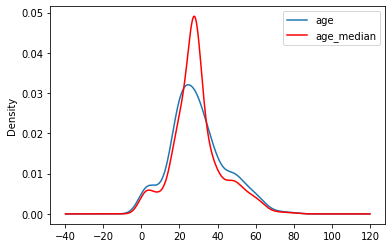

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
print(df['age'].std())
print(df['age_median'].std())

14.562243434125529
12.999022882894222


### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation


### ***Creating new Column feature/Assigning new Category***

In [ ]:
df=pd.read_csv('/tmp/titanic_train.csv')

In [ ]:
df['cabin_null']=np.where(df['cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()
#77 percent of values are null 

0.7752941176470588

In [ ]:
df.head(20)#20 is basically no of rows you want to see

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,cabin_null
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,1
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0,1
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0,1
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0,1


In [ ]:
df.groupby(['survived'])['cabin_null'].mean()#correlation b/w survived and cabin_null 


survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

In [ ]:
df['cabin'].fillna('M').head(20)#assigned a new category

0       M
1       M
2       M
3       M
4       M
5       M
6       M
7       M
8       M
9       M
10    C82
11    D15
12    C50
13      M
14      M
15      M
16      M
17      M
18    E33
19      M
Name: cabin, dtype: object

***Pros***
 

1.   Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical.
2.   List item Negates the loss of data by adding an unique category.

***Cons:***


1. Adds another feature to the model while encoding, which may result in poor performance





### ***Predicting The Missing Values:***Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
df_with_null=df[['passenger_id','pclass','survived','sibsp','parch','fare','age']]
df_with_null

,passenger_id,pclass,survived,sibsp,parch,fare,age
0,1216,3,1,0,0,7.7333,NaN
1,699,3,0,0,0,8.6625,38.0
2,1267,3,0,1,1,24.1500,30.0
3,449,2,1,1,3,23.0000,54.0
4,576,2,0,0,0,13.0000,40.0
...,...,...,...,...,...,...,...
845,158,1,0,0,0,50.0000,55.0
846,174,1,0,0,0,29.7000,58.0
847,467,2,1,1,0,26.0000,24.0
848,1112,3,0,1,1,13.7750,3.0


In [ ]:
df_without_null=df_with_null.dropna()

In [ ]:
df_without_null=df_without_null.reset_index()#used to reset the index

In [ ]:
df_without_null

,index,passenger_id,pclass,survived,sibsp,parch,fare,age
0,1,699,3,0,0,0,8.6625,38.0
1,2,1267,3,0,1,1,24.1500,30.0
2,3,449,2,1,1,3,23.0000,54.0
3,4,576,2,0,0,0,13.0000,40.0
4,5,1083,3,0,0,0,22.5250,28.0
...,...,...,...,...,...,...,...,...
670,845,158,1,0,0,0,50.0000,55.0
671,846,174,1,0,0,0,29.7000,58.0
672,847,467,2,1,1,0,26.0000,24.0
673,848,1112,3,0,1,1,13.7750,3.0


In [ ]:
#All features except age
train_df_x=df_without_null.iloc[:,:6]
#only age
train_df_y=df_without_null.iloc[:,6]
#training with available data
lr.fit(train_df_x,train_df_y)

LinearRegression()

In [ ]:
df_with_null=df_with_null[['passenger_id','pclass','survived','sibsp','parch','fare']].fillna(method='ffill',axis=1)

In [ ]:
df_with_null['age']=df['age']

In [ ]:
# df_with_null
df_with_null.isnull().sum()

passenger_id      0
pclass            0
survived          0
sibsp             0
parch             0
fare              0
age             174
dtype: int64

In [ ]:
#predict for the whole dataset and the replace only the mssing values
test_df=df_with_null.iloc[:,:6]
age_predicted=pd.DataFrame(lr.predict(test_df),columns=['age'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- fare
Feature names seen at fit time, yet now missing:
- index

  warnings.warn(message, FutureWarning)


In [ ]:
age_predicted

,age
0,189.957522
1,244.959944
2,484.657408
3,430.539554
4,308.600070
...,...
845,853.402943
846,553.865701
847,462.761051
848,331.090198


In [ ]:
df_with_null.age.fillna(age_predicted.age,inplace=True)

In [ ]:
df_with_null

,passenger_id,pclass,survived,sibsp,parch,fare,age
0,1216.0,3.0,1.0,0.0,0.0,7.7333,189.957522
1,699.0,3.0,0.0,0.0,0.0,8.6625,38.000000
2,1267.0,3.0,0.0,1.0,1.0,24.1500,30.000000
3,449.0,2.0,1.0,1.0,3.0,23.0000,54.000000
4,576.0,2.0,0.0,0.0,0.0,13.0000,40.000000
...,...,...,...,...,...,...,...
845,158.0,1.0,0.0,0.0,0.0,50.0000,55.000000
846,174.0,1.0,0.0,0.0,0.0,29.7000,58.000000
847,467.0,2.0,1.0,1.0,0.0,26.0000,24.000000
848,1112.0,3.0,0.0,1.0,1.0,13.7750,3.000000


**pros**:
1.   Imputing the missing variable may result in an improvement.


**cons**
1.  Sometimes may perform poorly.
2.  outliers may also come.




### ***Using Algorithms Which Support Missing Values***:
KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. In this particular dataset, taking into account the person’s age, sex, class etc, we will assume that people having same data for the above mentioned features will have the same kind of fare.


Another algorithm which can be used here is RandomForest. This model produces a robust result because it works well on non-linear and the categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

***Pros:***
 

1.   Does not require creation of a predictive model for each attribute with missing data in the dataset

***Cons:***


1.   Is a very time consuming process and it can be critical in data mining where large databases are being extracted.
2.   Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result



# ***REFERENCES***


1.   [github_link](https://github.com/krishnaik06/Feature-Engineering-Live-sessions)
2.  [youtube_krish_naik](https://www.youtube.com/watch?v=S6hcGwhNbIM)

3.   [5-ways-handle-missing-values-machine-learning-datasets](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/)
4.   [Dataset](https://www.kaggle.com/c/titanic-dataset/data?select=titanic_train.csv)



